# Introduction

This notebook will cover customer churn prediction, 
trying to predict customers with a higher probability of continuing with their account or not.

I'll try to address the problem using this framework:

**framework:**

* Problem definition
* Data exploration
* evaluation
* Features
* Modelling
* Experimentationation

## Importing Tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# for plots to appear inside notebook
%matplotlib inline

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [3]:
# this code ignores all the warnings 
import warnings
warnings.filterwarnings("ignore") # you can change "igonre" to "default"

## Explore Data

#### load data

In [4]:
# import train data 
customer_train_data = pd.read_csv("data/playground-series-s4e/train.csv")
customer_train_data.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,165033,15732798,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


In [5]:
# import test data 
customer_test_data = pd.read_csv("data/playground-series-s4e/test.csv")
customer_test_data.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58
110022,275056,15663942,Tuan,621,France,Female,37.0,7,87848.39,1,1.0,0.0,24210.56


**for now i will explore train data**

In [3]:
# lets check len of train data
len(customer_train_data)

165034

In [4]:
# check colums' info
customer_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
# check for null values
customer_train_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# check stats of defaulters and non dafaulters
customer_train_data["Exited"].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

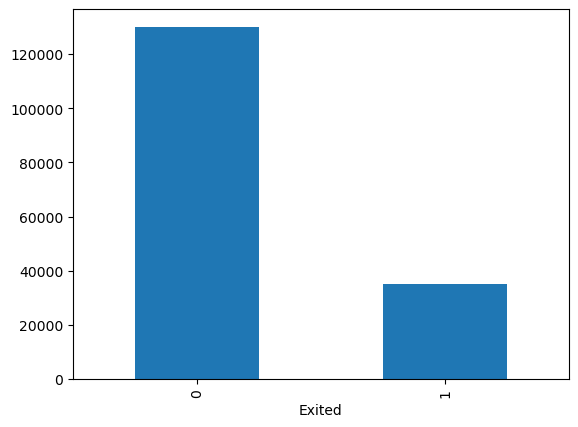

In [17]:
# visualize stats
customer_train_data["Exited"].value_counts().plot(kind="bar");

In [18]:
customer_train_data[:100]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,15791534,Scott,588,Germany,Male,30.0,10,126683.40,1,1.0,1.0,131636.55,0
96,96,15671139,Shih,659,Spain,Female,39.0,0,107042.74,1,1.0,0.0,102284.20,1
97,97,15576935,Ampt,743,Spain,Male,43.0,2,161807.18,2,0.0,1.0,93228.86,0
98,98,15669946,Shih,639,Germany,Female,43.0,7,123873.52,1,1.0,1.0,51113.17,0


In [20]:
#check active members
customer_train_data["IsActiveMember"].value_counts()

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

<Axes: xlabel='IsActiveMember'>

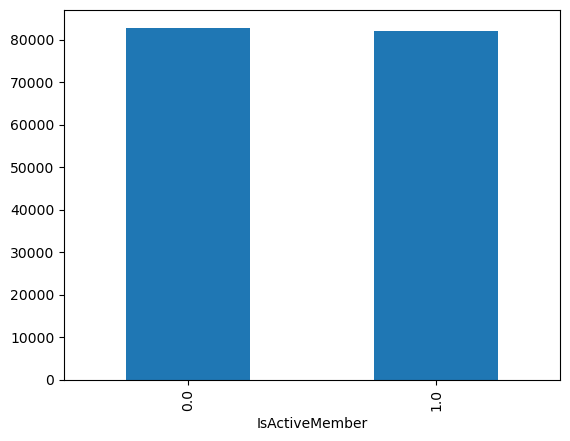

In [21]:
customer_train_data["IsActiveMember"].value_counts().plot(kind="bar")

In [26]:
# who has a credit card
customer_train_data["HasCrCard"].value_counts();

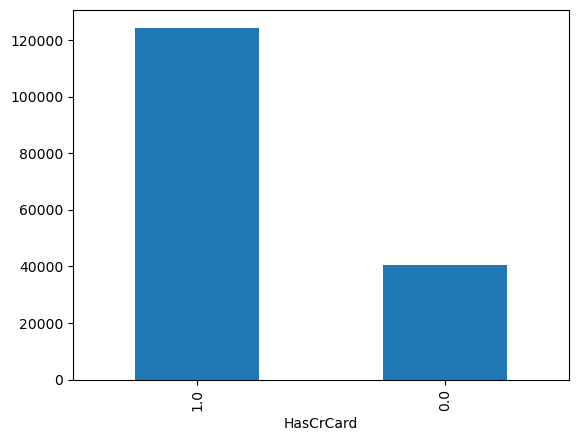

In [25]:
customer_train_data["HasCrCard"].value_counts().plot(kind="bar");

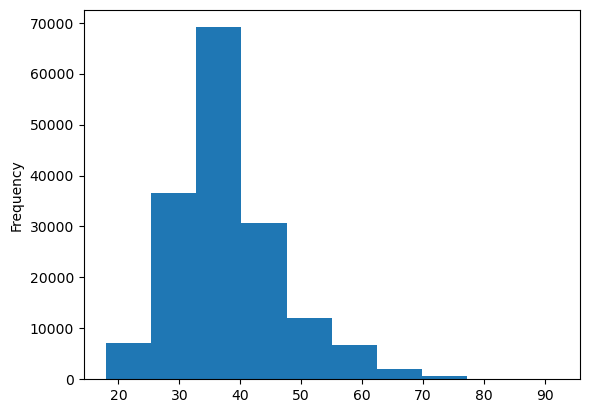

In [28]:
# check age distribution
customer_train_data.Age.plot.hist();

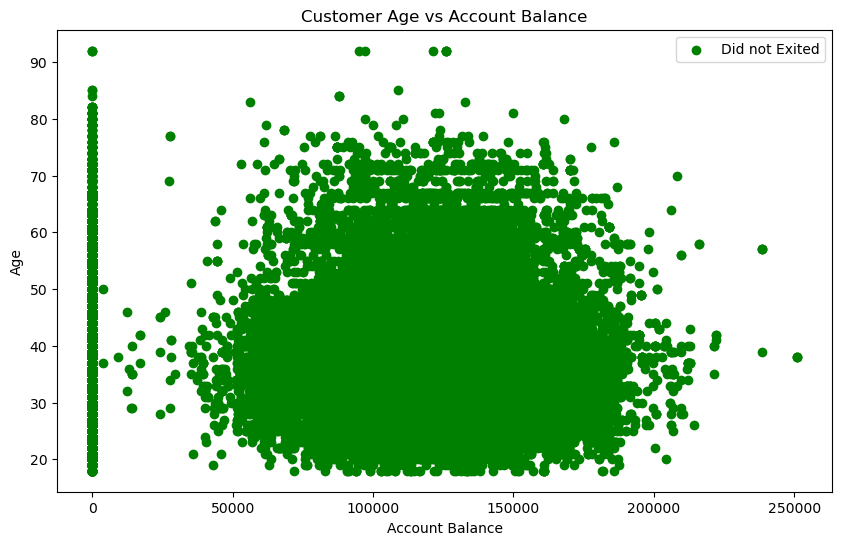

In [36]:
# plot scatter graph on age and account balance
# create figure
plt.figure(figsize=(10, 6))

# Scatter for individuals who did not Exit
plt.scatter(customer_train_data.Balance[customer_train_data.Exited == 0],
            customer_train_data.Age[customer_train_data.Exited == 0],
            c="green")

# Add some infor
plt.title("Customer Age vs Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Age")
plt.legend(["Did not Exited"]);

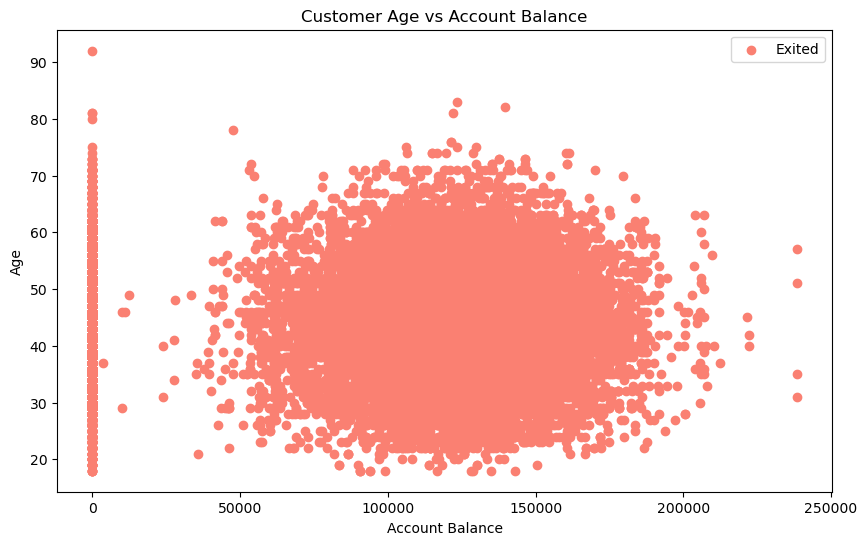

In [37]:
# plot scatter graph on age and account balance
# create figure
plt.figure(figsize=(10, 6))

# Scatter for individuals who did Exit
plt.scatter(customer_train_data.Balance[customer_train_data.Exited == 1],
            customer_train_data.Age[customer_train_data.Exited == 1],
            c="salmon")

# Add some infor
plt.title("Customer Age vs Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Age")
plt.legend(["Exited"]);

In [38]:
customer_train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [39]:
#lets check customers awareness to bank products
customer_train_data.NumOfProducts.value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

### Clean data

In [28]:
customer_train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


**skip this section for experemental purposes**

### Modelling 

I'm going to model using:
* SGD Classifier
* RandomForestClassifier
* Linear Regression

split data

In [6]:
X = customer_train_data.drop("Exited", axis=1)
y = customer_train_data["Exited"]

In [7]:
X.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [8]:
customer_test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [9]:
X.shape

(165034, 13)

In [10]:
customer_test_data.shape

(110023, 13)

will try to use SGDClassifier Model and other classification models for comparison,

the SDGClassifier seems ideal since we have more than 100K samples,

but will try other models as well

#### transform strings

In [11]:
# before fitting we need to convert strings to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Surname", "Geography", "Gender"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<165034x2812 sparse matrix of type '<class 'numpy.float64'>'
	with 1927295 stored elements in Compressed Sparse Row format>

In [12]:
transformed_X.shape

(165034, 2812)

transform test data

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Surname", "Geography", "Gender"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_test_data = transformer.fit_transform(customer_test_data)
transformed_test_data

<110023x2723 sparse matrix of type '<class 'numpy.float64'>'
	with 1284272 stored elements in Compressed Sparse Row format>

In [14]:
transformed_test_data.shape

(110023, 2723)

**The resulting dataframes have different shapes, we're combining the two before transformation**

In [16]:
# combine the 2 data frames
combined_data = pd.concat([X, customer_test_data], axis=0, ignore_index=True)

In [17]:
# transform the combined data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Surname", "Geography", "Gender"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

transformed_combined_data = transformer.fit_transform(combined_data)
transformed_combined_data

<275057x2904 sparse matrix of type '<class 'numpy.float64'>'
	with 3211567 stored elements in Compressed Sparse Row format>

In [18]:
# split the combined data to original data frames
num_rows_X = X.shape[0]
transformed_X = transformed_combined_data[:num_rows_X, :]
transformed_test = transformed_combined_data[num_rows_X:, :]

In [19]:
# split the data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

## 1. SGD Classifier model 

fit model

In [20]:
np.random.seed(42)

# instanciate model
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd_clf.fit(X_train, y_train)

SGDClassifier(max_iter=5)

In [21]:
# score model
sgd_clf.score(X_test, y_test)

0.5895113157815008

ROC curve for SGD Classifier model

In [22]:
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot the line with no predictive power (baseline)
    plt.plot([0, 1],[0, 1], color="darkblue", linestyle="--", label="Guessing")

    #Customise the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

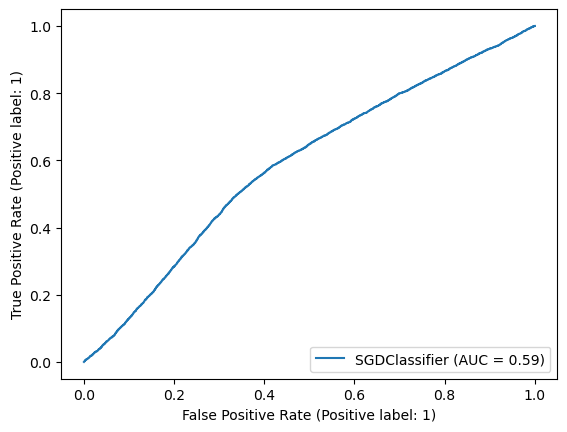

In [23]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import RocCurveDisplay 
plot_roc_curve = RocCurveDisplay.from_estimator(sgd_clf, X_test, y_test)

make predictions using SGD classifier

In [26]:
sgd_test_preds = sgd_clf.predict(transformed_test)

## 2. Random Forest Classifier

fit the model

In [29]:
X_train.shape

(132027, 2904)

on 10 000 sample

In [30]:
# fit the model on small sample size 
np.random.seed(42)

# Instanciate model
rs_clf = RandomForestClassifier(n_jobs=-1,
                                max_samples=10000) # 10 000 samples

rs_clf.fit(X_train, y_train)

RandomForestClassifier(max_samples=10000, n_jobs=-1)

In [ ]:
#score model
rs_clf.score(X_test, y_test)

## Export Results for Submission

In [27]:
# format results for the competition
df_preds = pd.DataFrame()
df_preds["id"] = customer_test_data["id"]
df_preds["Exited"] = sgd_test_preds
df_preds.head()

,id,Exited
0,165034,0
1,165035,0
2,165036,0
3,165037,0
4,165038,1


In [93]:
# Export prediction data
df_preds.to_csv("data/playground-series-s4e/test_predictions-v2.csv", 
                index=False)

In [62]:
customer_test_data.duplicated("CustomerId").sum()

90325

In [63]:
len(customer_test_data)

110023